#**Netflix Content Analysis: Understanding Genre Preferences and Recommending Personalized Content**


### Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

##**Business Problem**

### In this business problem, the objective is to analyze the Netflix dataset and gain insights into genre preferences of users. By leveraging the attributes such as "Type," "Title," "Rating," "Listed_in," and "Description," the goal is to understand the viewers' preferences for different genres and develop strategies to recommend personalized content also the goal will be to determine what people prefer and what is the best time to launch a paticular movie or series.


###**Load the dataset and the required libraries**

In [76]:
import numpy as np
import pandas as pd
df = pd.read_csv("original_netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###**Understanding the data**
#### Lets dive now into understanding the data what we are going to work on


In [77]:
df.shape

(8807, 12)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [79]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


##### After above initial analysis we can concurr that there are 8807 entries in the dataset with 12 columns , almost all the columns are object datatype , few date time columns need to be changed as when further EDA requires

##Data Cleaning

#### Lets do some minor data cleaning if neccesary before we go ahead for our Exploratory data analysis

1.   Lets convert our Date added column from object datatype to date time.
2.   Lets check if our dataset contains any duplicated values and delete them



In [80]:
df['date_added']= pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [81]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


##### The data type of date added column was changed and also there were no duplicates in the dataframe.

##### Let us check regarding the null values in the dataset

In [82]:
df.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

##### As we can see there are many null values present in some columns

##### For duration let me add mean duration for missing values, for director & cast & country will add others and drop the rest nulls.

In [83]:
df['director'].fillna('Others',inplace = True)
df['cast'].fillna('Others',inplace = True)
df['country'].fillna('Others',inplace = True)

In [84]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [85]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)


In [86]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [87]:
df.shape

(8790, 12)

### **Exploratory Data Analysis**

##### Lets Analyse TV Shows and Movies seprately and determine what are the most made genres all time

In [88]:
df_Movies = df.loc[df['type'] == 'Movie']
df_tvshows = df.loc[df['type'] == 'TV Show']

In [89]:
df_Movies['listed_in'].value_counts()[:5]

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64

In [90]:
df_tvshows['listed_in'].value_counts()[:5]

Kids' TV                                             219
International TV Shows, TV Dramas                    121
Crime TV Shows, International TV Shows, TV Dramas    110
Kids' TV, TV Comedies                                 97
Reality TV                                            95
Name: listed_in, dtype: int64

In [91]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [92]:
movies_over_time = df_Movies.groupby('release_year')['show_id'].count().sort_values(ascending=False).reset_index()
movies_over_time.rename(columns={'show_id': 'counts_of_movies'}, inplace=True)
movies_over_time


,release_year,counts_of_movies
0,2018,767
1,2017,765
2,2016,658
3,2019,633
4,2020,517
...,...,...
68,1961,1
69,1963,1
70,1966,1
71,1947,1


In [93]:
shows_over_time = df_tvshows.groupby('release_year')['show_id'].count().sort_values(ascending=False).reset_index()
shows_over_time.rename(columns = {'show_id' : 'counts_of_shows'}, inplace = True)
shows_over_time

,release_year,counts_of_shows
0,2020,436
1,2019,397
2,2018,379
3,2021,315
4,2017,265
5,2016,243
6,2015,159
7,2014,88
8,2012,63
9,2013,61


##### From above we can agree that overtime the production of TV-Shows and movies has increased and also the amount of movies produced every year are more than TV shows

In [94]:
df['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

##### Also the amount of movies produced overtime are way more than TV shows

In [95]:
df['country'].value_counts()[:5]

United States     2809
India              972
Others             829
United Kingdom     418
Japan              243
Name: country, dtype: int64

##### The top 5 places where most Movies & Tv shows are produced

## **Data Visualization**

#### Lets import the neccesary libraries

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Let us show how the production of Movies & TV series has grown over time using Histogram

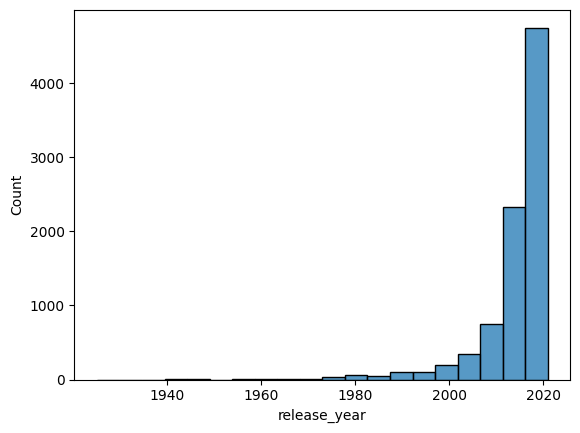

In [97]:
sns.histplot(df['release_year'], bins=20)
plt.show()


#### Lets visually represent the data of TV-shows made over time with respect to the Movies made over time

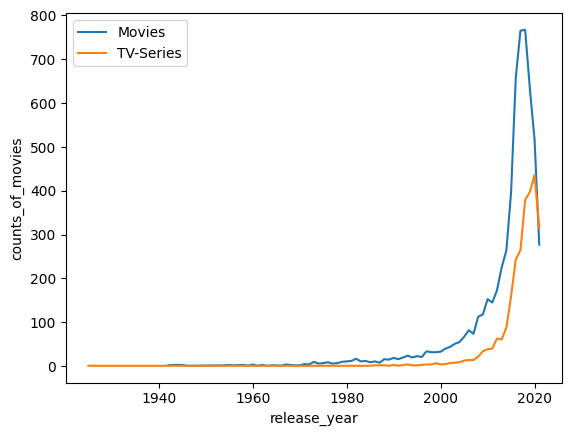

In [98]:
sns.lineplot(data=movies_over_time, x='release_year', y='counts_of_movies', label = 'Movies')
sns.lineplot(data=shows_over_time, x='release_year', y='counts_of_shows', label = 'TV-Series')
plt.show()


#### Now lets determine the top 3 countries that make both TV-Shows & Movies

<Axes: xlabel='type', ylabel='count'>

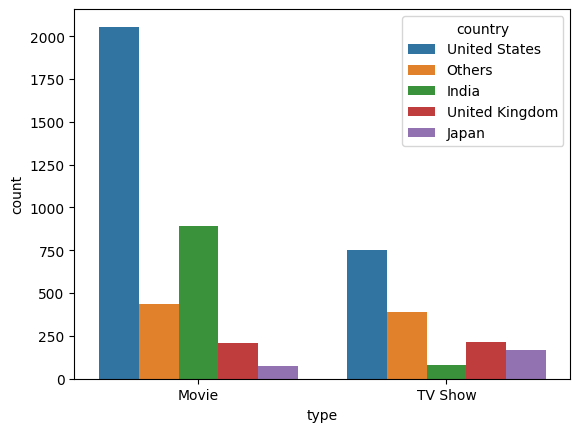

In [99]:
top_3_countries = df['country'].value_counts()[:5].index
top_3_data = df.loc[(df['country'].isin(top_3_countries))]
sns.countplot(data=top_3_data, x='type', hue='country')

#### For which category was maximum movies & TV shows made

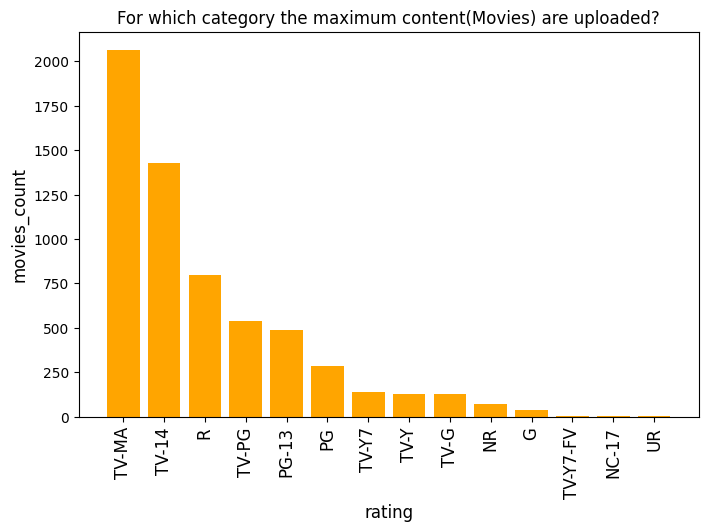

In [100]:
df_2 = df.query("type == 'Movie'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
plt.figure(figsize=(8, 5))
plt.bar(df_2['rating'], df_2['movies_count'], width=0.8, color='orange')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('rating', fontsize=12)
plt.ylabel('movies_count', fontsize=12)
plt.title('For which category the maximum content(Movies) are uploaded?')
plt.show()


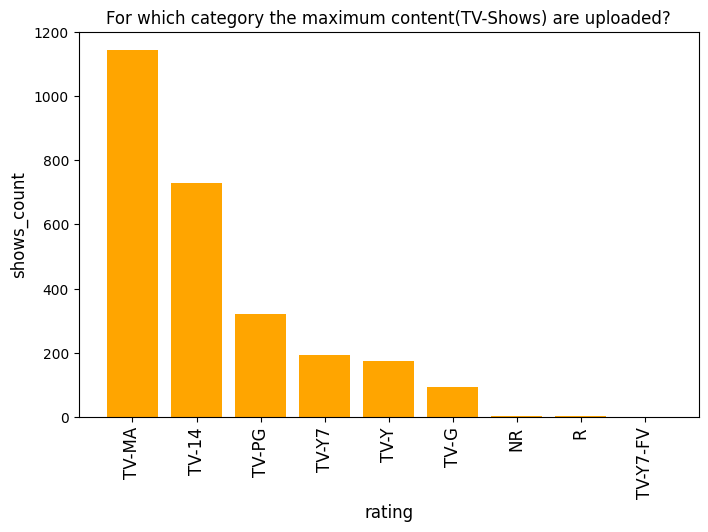

In [101]:
df_2 = df.query("type == 'TV Show'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "shows_count"})
plt.figure(figsize=(8, 5))
plt.bar(df_2['rating'], df_2['shows_count'], width=0.8, color='orange')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('rating', fontsize=12)
plt.ylabel('shows_count', fontsize=12)
plt.title('For which category the maximum content(TV-Shows) are uploaded?')
plt.show()

#### Let us determine which directors made the highest movies over time

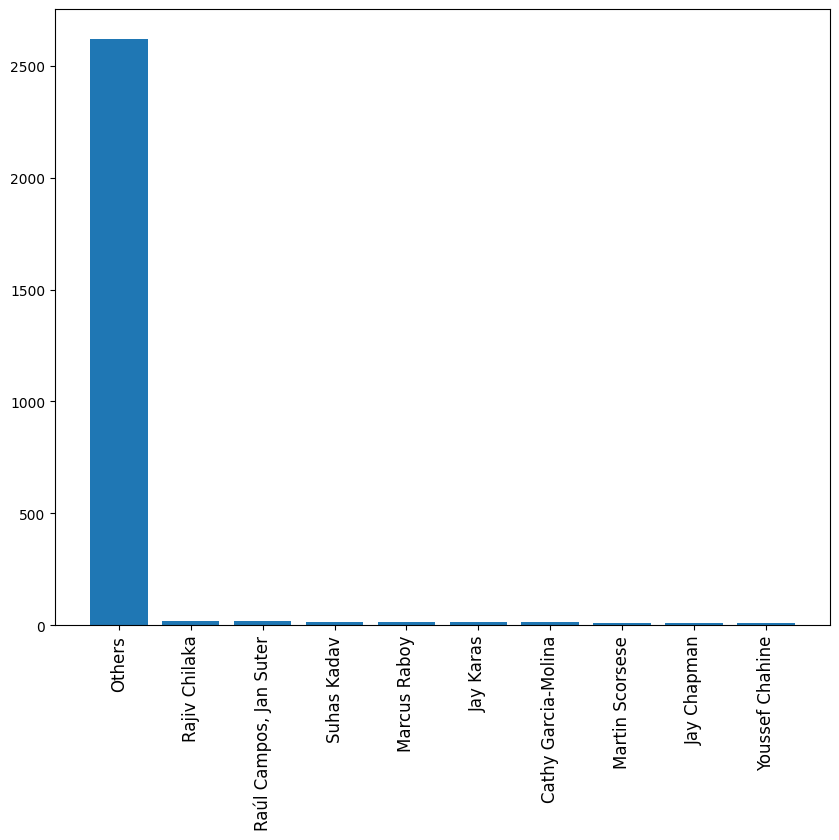

In [102]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=12)
data_x = df['director'].value_counts()[:10]
data_y = data_x.index
plt.bar(data_y, data_x)
plt.show()

#### Lets Analyse the total Movies & TV-shows directed by a director

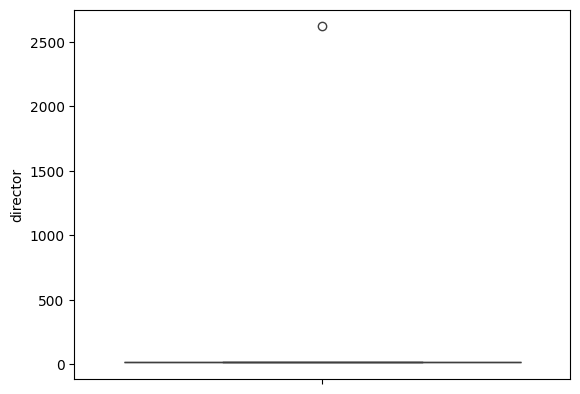

In [103]:
data_directors = df['director'].value_counts().reset_index()[:5]
sns.boxplot(y=data_directors['director'])
plt.show()

#**Buisness insights**

Based on the exploratory data analysis of the Netflix dataset, we can derive the following business insights:

1. Genre Preferences:
   - The top 5 genres for movies are Dramas, International Movies; Documentaries; Stand-Up Comedy; Comedies, Dramas, International Movies; and Dramas, Independent Movies, International Movies.
   - The top 5 genres for TV shows are Kids' TV; International TV Shows, TV Dramas; Crime TV Shows, International TV Shows, TV Dramas; Kids' TV, TV Comedies; and Reality TV.

2. Production Trends:
   - The number of movies produced over time has increased significantly, while the number of TV shows has also shown a consistent growth but at a slower pace.
   - Movies have been consistently produced in higher numbers compared to TV shows.

3. Country Analysis:
   - The United States is the leading country in terms of producing movies and TV shows, followed by India, the United Kingdom, Japan, and South Korea.

4. Content Ratings:
   - The most common ratings for movies are "TV-MA," "TV-14," and "R," indicating that these categories have the highest count of movies.
   - For TV shows, the most common ratings are "TV-MA," "TV-14," and "TV-PG."

5. Director Analysis:
   - The directors who have made the highest number of movies are not explicitly mentioned in the analysis due to the lack of available data. However, further exploration can be done on the directors' column to identify the top directors.

#**Recommendations**


   - Focus on producing more content in the popular genres identified in the analysis, such as dramas, international movies, documentaries, and stand-up comedy for movies, and kids' TV, international TV shows, crime TV shows, and reality TV for TV shows.
   - Consider leveraging the success of genres like dramas and international movies to develop more content catering to diverse cultures and languages.
   - Collaborate with popular directors and production houses to create exclusive content that appeals to a wide audience.
   - Capitalize on the growth of the streaming industry by continuously expanding the content library with a diverse range of movies and TV shows.
   - Use viewer ratings and feedback to improve content recommendations and personalize the user experience.
   - Analyze viewership patterns and release timings to identify the best time to launch a particular movie or TV show.
   - Explore co-production opportunities with countries like India, the United Kingdom, Japan, and South Korea to tap into their respective markets and diversify the content offering.

These insights and recommendations can guide Netflix in understanding viewer preferences, enhancing the content library, and providing a more personalized and engaging experience to its global subscriber base.